In [ ]:
##Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [13]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Ironhack\WEEK 5\LABS\lab-eda-bivariate-main\EXCEL\amz_uk_price_prediction_dataset.csv')

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


In [15]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [ ]:
### Part 1: Analyzing Best-Seller Trends Across Product Categories

#**Objective**: Understand the relationship between product categories and their best-seller status.

#1. **Crosstab Analysis**:
#    - Create a crosstab between the product `category` and the `isBestSeller` status.


In [17]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [21]:
# Calcular la proporción de best-sellers en cada categoría
crosstab_result['proportion_best_sellers'] = crosstab_result[True] / (crosstab_result[True] + crosstab_result[False])

print(crosstab_result[['proportion_best_sellers']])

isBestSeller                    proportion_best_sellers
category                                               
3D Printers                                    0.004032
3D Printing & Scanning                         0.000492
Abrasive & Finishing Products                  0.020000
Action Cameras                                 0.000589
Adapters                                       0.011811
...                                                 ...
Wind Instruments                               0.028000
Window Treatments                              0.020921
Women                                          0.011985
Women's Sports & Outdoor Shoes                 0.010209
eBook Readers & Accessories                    0.000000

[296 rows x 1 columns]


In [25]:
# Ordenar por proporción de best-sellers de manera descendente
sorted_crosstab_result = crosstab_result.sort_values(by='proportion_best_sellers', ascending=False)

print(sorted_crosstab_result[['proportion_best_sellers']])

isBestSeller                      proportion_best_sellers
category                                                 
Grocery                                          0.058135
Smart Home Security & Lighting                   0.057692
Health & Personal Care                           0.057686
Mobile Phone Accessories                         0.042471
Power & Hand Tools                               0.035339
...                                                   ...
CD, Disc & Tape Players                          0.000000
General Music-Making Accessories                 0.000000
Snowboard Boots                                  0.000000
Boxes & Organisers                               0.000000
eBook Readers & Accessories                      0.000000

[296 rows x 1 columns]


In [ ]:
#2. **Statistical Tests**:
#    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [27]:
from scipy.stats import chi2_contingency

In [29]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36684.23786636857, 0.0)

In [31]:

# Realizar la prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(crosstab_result)

print("Estadístico Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:")
print(expected)

Estadístico Chi-cuadrado: 36684.23786636857
Valor p: 0.0
Grados de libertad: 590
Frecuencias esperadas:
[[2.47193964e+02 8.09882713e-01 1.85076756e-04]
 [4.05371625e+03 1.32812090e+01 3.03506057e-03]
 [2.49203347e+02 8.16466063e-01 1.86581203e-04]
 [1.69145759e+03 5.54173022e+00 1.26641233e-03]
 [2.53182120e+02 8.29501733e-01 1.89560152e-04]
 [8.50215078e+03 2.78556353e+01 6.36565092e-03]
 [1.06659816e+02 3.49450041e-01 7.98573411e-05]
 [2.57176598e+02 8.42588862e-01 1.92550861e-04]
 [9.51783364e+03 3.11833217e+01 7.12610350e-03]
 [1.50008640e+04 4.91473992e+01 1.12313068e-02]
 [9.32544259e+03 3.05529901e+01 6.98205827e-03]
 [2.38244365e+02 7.80561099e-01 1.78376096e-04]
 [3.22941764e+03 1.05805557e+01 2.41789941e-03]
 [9.44704154e+03 3.09513853e+01 7.07310070e-03]
 [6.68808280e+03 2.19121962e+01 5.00743888e-03]
 [5.26284806e+02 1.72426931e+00 3.94035044e-04]
 [1.90296406e+04 6.23468982e+01 1.42476948e-02]
 [2.77192166e+03 9.08165957e+00 2.07536729e-03]
 [2.53178196e+02 8.29488876e-01 

In [ ]:
#    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [35]:
from scipy.stats.contingency import association


In [41]:
# Aplicar la prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(crosstab_result)

# Calcular Cramér's V
n = crosstab_result.sum().sum()  # total de observaciones
k, r = crosstab_result.shape  # dimensiones de la tabla

cramers_v = np.sqrt(chi2 / (n * (min(k-1, r-1))))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.08663731815334759


In [ ]:
#Conclusion: ser un best-seller es relativamente independiente de la categoría del producto, ya que la relacion es muy baja.

In [ ]:
#3. **Visualizations**:
 #   - Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


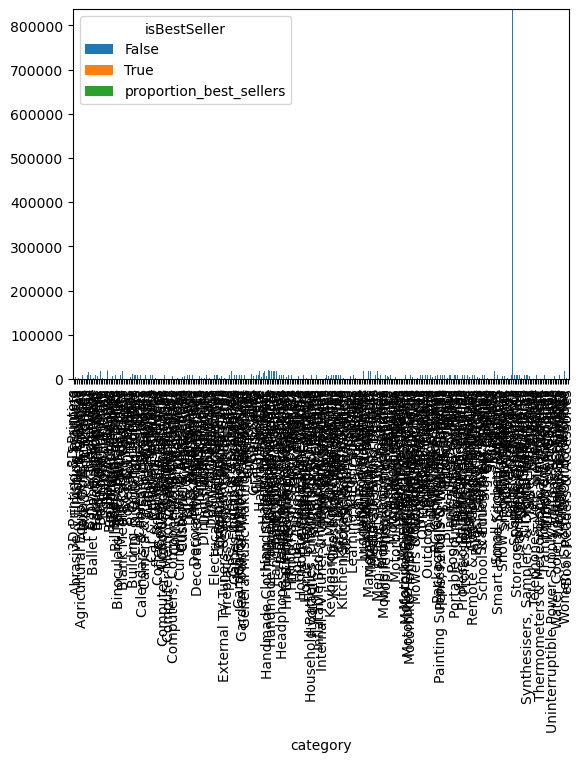

In [43]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True)
plt.show()

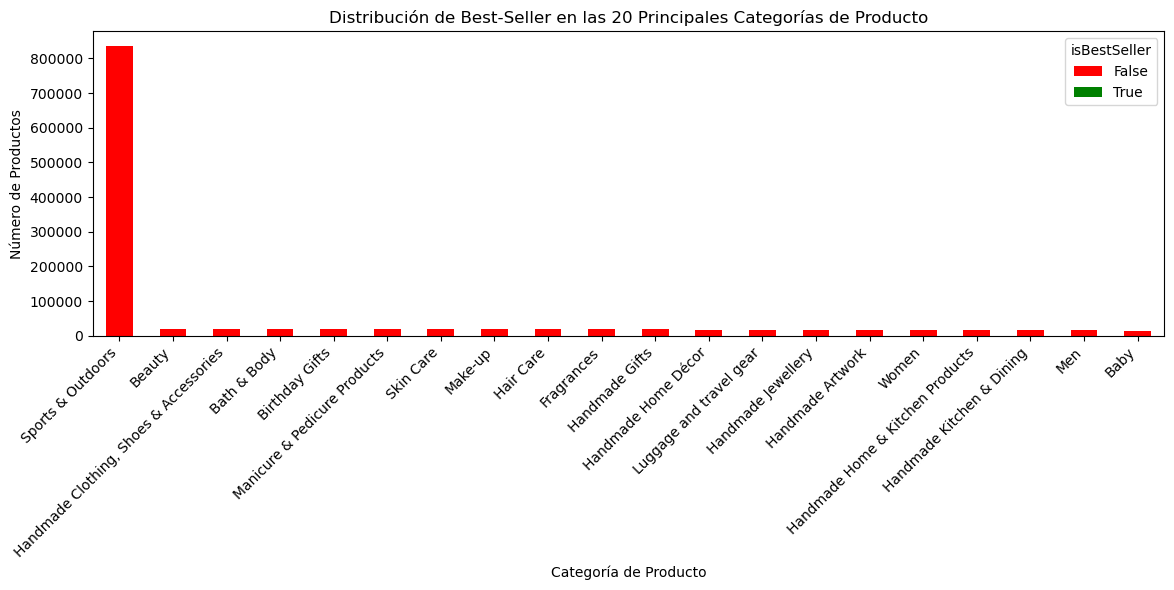

In [61]:
#LIMITAR A 20 SOBRE LOS RESULTADOS DEL CROSSTAB PARA PODER LEERLO

# Crear la tabla cruzada
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Agregar columna 'total' para calcular el total número de productos por categoría
crosstab['total'] = crosstab[True] + crosstab[False]

# Obtener las 20 categorías principales basadas en la suma total
top20_crosstab = crosstab.sort_values('total', ascending=False).head(20)

# Remover la columna 'total' que no queremos incluir en la visualización
top20_crosstab = top20_crosstab.drop(columns='total')

# Graficar el gráfico de barras apiladas
top20_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])

# Configurar el título y las etiquetas
plt.title('Distribución de Best-Seller en las 20 Principales Categorías de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Número de Productos')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
#### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

#**Objective**: Investigate how different product categories influence product prices.
#For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
    
#*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [65]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [63]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [67]:
data_series = df['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [ ]:
# Use a violin plot to visualize the distribution of `price` across different product `categories`.
#Filter out the top 20 categories based on count for better visualization.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4172\457446373.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_categories, x='price', y='category', palette="coolwarm")


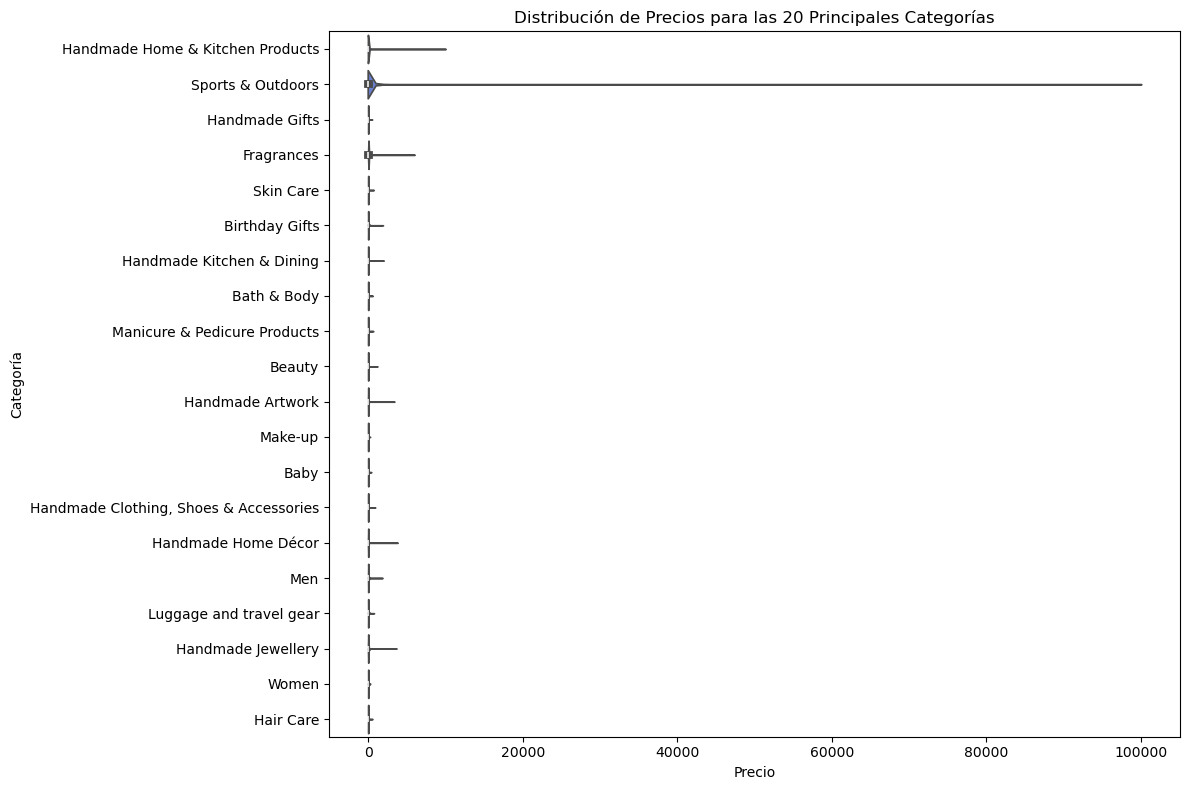

In [71]:
# Calcular las 20 categorías más frecuentes
top_categories = df['category'].value_counts().nlargest(20).index

# Filtrar el DataFrame para incluir solo las 20 principales categorías
df_top_categories = df[df['category'].isin(top_categories)]

# Crear el gráfico de violín
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_top_categories, x='price', y='category', palette="coolwarm")

# Configurar el título y etiquetas del gráfico
plt.title('Distribución de Precios para las 20 Principales Categorías')
plt.xlabel('Precio')
plt.ylabel('Categoría')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
#2. **Bar Charts**:
#    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
 #   - Which product category commands the highest average price? Don't filter here by top categories.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4172\1225294037.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_categories, x='category', y='price', palette="coolwarm")


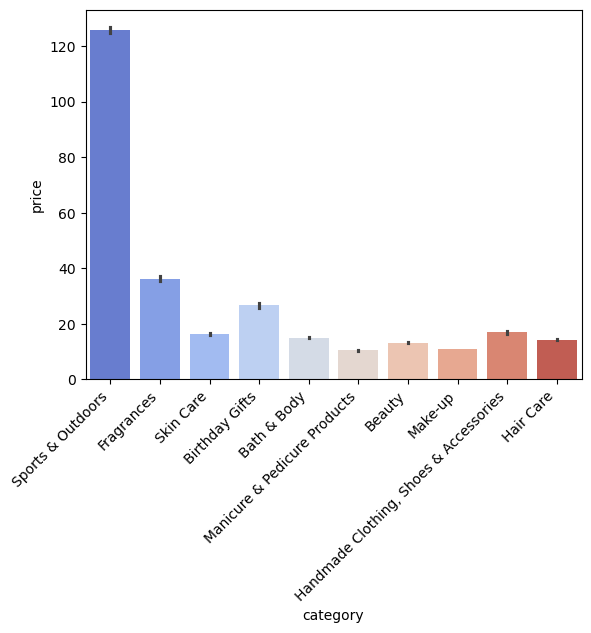

In [86]:
top_categories = df['category'].value_counts().nlargest(10).index


# Filtrar el DataFrame para incluir solo las 20 principales categorías
df_top_categories = df[df['category'].isin(top_categories)]

sns.barplot(data=df_top_categories, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#3. **Box Plots**:
 # - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. 
 # Filter out the top 10 categories based on count for better visualization.
 #   - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4172\533424896.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_categories, x='category', y='stars', palette="coolwarm")


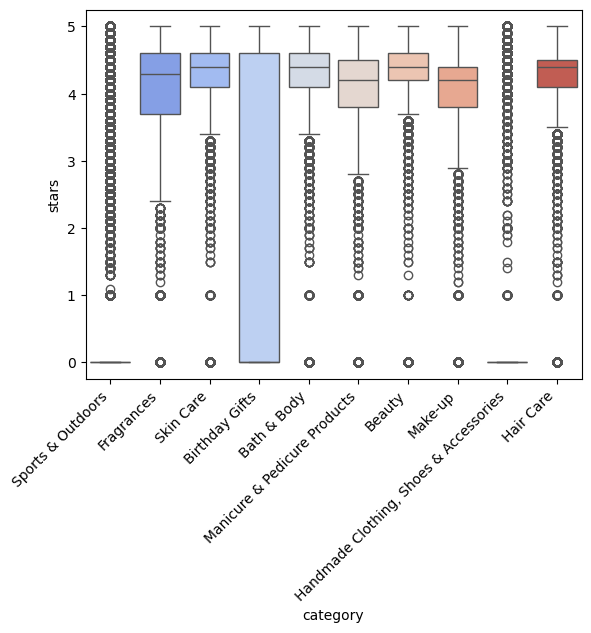

In [87]:
sns.boxplot(data=df_top_categories, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#**Correlation Coefficients**:
#- Calculate the correlation coefficient between `price` and `stars`.
#- Is there a significant correlation between product price and its rating?


In [90]:
correlation = df['price'].corr(df['stars'])
correlation

-0.1249067326214861

In [ ]:
##Interpretación del Valor de Correlación
#Rango del Coeficiente de Correlación:

#La correlación varía entre (-1) y (1).
#Un valor de (1) indica una correlación positiva perfecta.
#Un valor de (-1) indica una correlación negativa perfecta.
#Un valor de (0) indica que no hay correlación lineal entre las variables.
#Correlación de (-0.1249):

#Magnitud: La magnitud (absoluta) de (0.1249) indica una correlación débil o baja.
#Signo Negativo: El signo negativo sugiere que hay una ligera relación inversa: a medida que una variable aumenta, la otra tiende a disminuir, aunque el efecto es muy débil.
#Interpretación en Contexto
#Débil Relación Inversa: Parece que a medida que el precio cambia, las calificaciones apenas muestran un ligero cambio en dirección contraria. Sin embargo, la magnitud del coeficiente es tan pequeña que la relación lineal no es estadísticamente significativa para tomar decisiones.

#Factores a Considerar: La baja correlación podría indicar que otros factores fuera de price influyen más significativamente en las calificaciones stars.

In [ ]:
#2. **Visualizations**:
#    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
#    - Use a correlation heatmap to visualize correlations between all numerical variables.
#    - Examine if product prices typically follow a normal distribution using a QQ plot. 


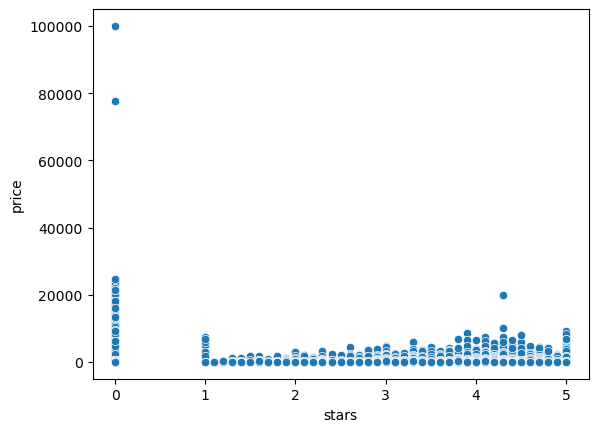

In [92]:
sns.scatterplot(data=df, x='stars', y='price')
plt.show()